# Customer Shopping Data

In [89]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import os
import sys

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

sb.set_style('whitegrid')

In [52]:
df = pd.read_csv("D:\Open Classroom\Datasets\Customer Shopping Dataset - Retail Sales Data\customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Statistical Representation

In [53]:
df.shape

(99457, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
invoice_no        99457 non-null object
customer_id       99457 non-null object
gender            99457 non-null object
age               99457 non-null int64
category          99457 non-null object
quantity          99457 non-null int64
price             99457 non-null float64
payment_method    99457 non-null object
invoice_date      99457 non-null object
shopping_mall     99457 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [55]:
df.isnull().sum().sum()

0

<Figure size 720x432 with 0 Axes>

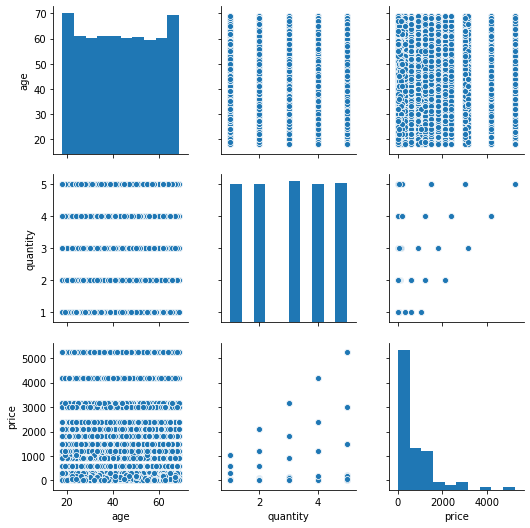

In [56]:
plt.figure(figsize = (10, 6))
sb.pairplot(df)

Text(0.5, 1, 'Pearsons Correlation of columns')

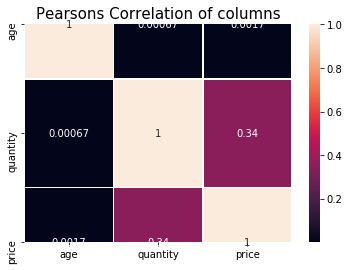

In [57]:
sb.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('Pearsons Correlation of columns', fontsize=(15))

In [58]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [59]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

## Objectives

- What is the total revenue generated from all invoices in this dataset?
- What is the average age of customers who made a purchase?
- Which shopping mall had the highest total sales?
- What is the most popular category of items purchased?
- What is the average price of items purchased?
- What is the most common payment method used by customers?
- What is the distribution of gender among customers?
- Is there a correlation between the quantity of items purchased and the payment method used?
- Is there a correlation between the age of customers and the category of items purchased?
- Is there a correlation between the shopping mall and the category of items purchased?

#### 1. Total Revenue

In [60]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [61]:
df['total'] = df['quantity'] * df['price']

In [62]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


In [63]:
total_rev = round(df['total'].sum(), 2)

In [64]:
print(f'The Total Sales Revenue: {total_rev}')

The Total Sales Revenue: 251505794.25


#### 2. Average Customers Age

In [68]:
print('The average age of customers : ' + str(round(df['age'].mean())))

The average age of customers : 43


#### 3. Sales per Shopping Mall

In [69]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


Text(0.5, 0, '')

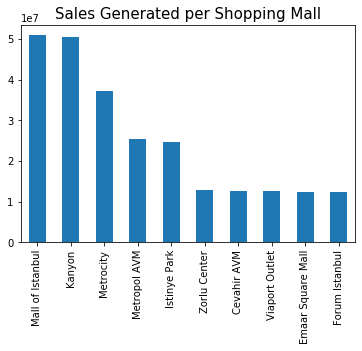

In [80]:
sales_per_shopping_mall = df.groupby(df['shopping_mall'])
sales_per_shopping_mall['total'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Sales Generated per Shopping Mall', fontsize = (15))
plt.xlabel(None)

#### 4. Most Popular Category

Text(0.5, 1.0, 'Most Popular Category')

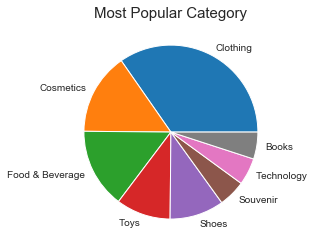

In [96]:
most_popular_category = df['category'].value_counts()
most_popular_category.plot(kind = 'pie')
plt.ylabel(None)
plt.title('Most Popular Category', fontsize=15)

Text(0.5, 1.0, 'Total Sales made per Category')

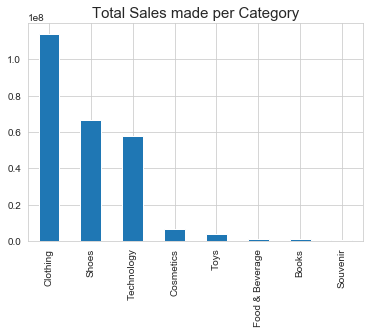

In [106]:
most_purchased_category = df.groupby('category')
most_purchased_category['total'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel(None)
plt.title('Total Sales made per Category', fontsize = 15)

#### 5. Most common Payment

Text(0, 0.5, '')

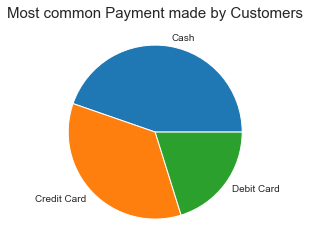

In [111]:
df['payment_method'].value_counts().plot(kind = 'pie')
plt.title('Most common Payment made by Customers', fontsize = 15)
plt.ylabel(None)

#### 6. Gender distibution among Cusomers

Text(0, 0.5, '')

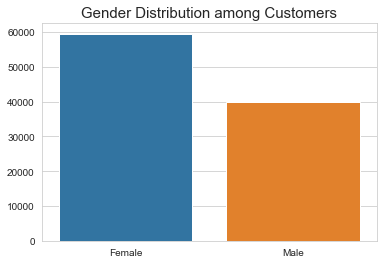

In [117]:
sb.countplot(df['gender'])
plt.title('Gender Distribution among Customers', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)

#### 7. Determine the correlation between Quantity and Payment method

In [119]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame with only the relevant columns
df2 = df[['quantity', 'payment_method']]

# Convert the payment method column to numerical using a label encoder
le = LabelEncoder()
df2['payment_method'] = le.fit_transform(df2['payment_method'])

# Calculate the Pearson correlation coefficient
corr = df2['quantity'].corr(df2['payment_method'], method='pearson')

print('Pearson correlation coefficient:', corr)


D:\Team Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Pearson correlation coefficient: 0.0010622825375583647


#### 8. Determine the correlation between age and category of items

In [120]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


In [133]:
df3 = df[['age', 'category']]

le = LabelEncoder()
df3['category_num'] = le.fit_transform(df3['category'])

corr = df3['age'].corr(df3['category_num'], method='pearson')

print(f'The Pearsons correlation between age and category is {corr}')

The Pearsons correlation between age and category is -0.0025227752748991604


D:\Team Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 9. Correlation between Shopping Mall and Category of Items Purchased

In [134]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


In [143]:
df4 = df[['shopping_mall', 'category']]

le = LabelEncoder()

df4 = df4.apply(lambda x: le.fit_transform(x))

df4_corr = df4['shopping_mall'].corr(df4['category'])

df4.head()
print(f'The Pearsons correlation between shopping mall and item category: {df4_corr}')

The Pearsons correlation between shopping mall and item category: -0.0017355565903165917


In [141]:
df4.head()

,shopping_mall,category
0,Kanyon,Clothing
1,Forum Istanbul,Shoes
2,Metrocity,Clothing
3,Metropol AVM,Shoes
4,Kanyon,Books


### Bonus Takeaway
- could as wel have done this shorter method for the correlation objectives. 

In [146]:
le = LabelEncoder()

df = df.apply(lambda x: le.fit_transform(x))

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,12165,44140,0,10,1,4,32,1,492,4,34
1,67813,3630,1,3,4,2,33,2,345,2,33
2,8722,52143,1,2,1,0,25,0,253,6,18
3,23002,99029,0,48,4,4,36,1,135,7,37
4,74054,27838,0,35,0,3,15,0,296,4,16


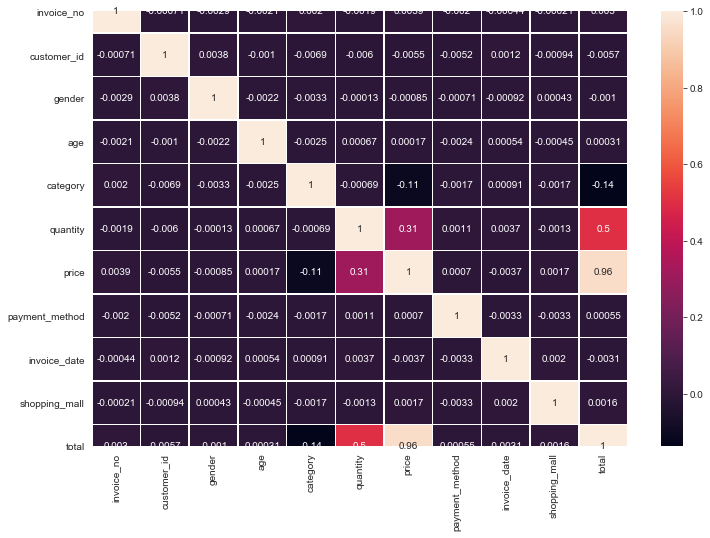

In [150]:
plt.figure(figsize = (12, 8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)

In [151]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,12165,44140,0,10,1,4,32,1,492,4,34
1,67813,3630,1,3,4,2,33,2,345,2,33
2,8722,52143,1,2,1,0,25,0,253,6,18
3,23002,99029,0,48,4,4,36,1,135,7,37
4,74054,27838,0,35,0,3,15,0,296,4,16
